In [2]:
import pandas as pd

In [3]:
url = 'https://github.com/eueung/pilrek/raw/master/pilrek.csv'
df  = pd.read_csv(url)

In [4]:
df.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
971,10/4/2019 15:38:56,Alumni,> 40 th,I Nyoman Pugeg Aryantha (SITH),"Emansipasi, kesetaraan dan kebhinekaan",Sesekali Rektor ITB orang Bali
972,10/7/2019 9:04:03,Mahasiswa,< 25 th,Edy Tri Baskoro (FMIPA-MA),Alumni SMPP Jombang,Dapat menjalankan amanah kepemimpinan ITB
973,10/8/2019 8:52:14,Dosen,25 - 40 th,Ary Setiaji Prihatmanto (STEI),Kapabilitas ybs utk meningkatkan ranking ITB,NaN
974,10/8/2019 11:45:04,Alumni,25 - 40 th,Ary Setiaji Prihatmanto (STEI),Akhlak dan budi pekerti,NaN
975,10/14/2019 13:50:34,Alumni,< 25 th,Gusti Ayu Putri Saptawati S (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),Jangan marah karena saya gocek dari jadi ca do...


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df.shape
df.dtypes

Timestamp               object
Kategori Anda           object
Kategori Umur Anda      object
CaRek Pilihan           object
Alasan Memilih CaRek    object
Harapan Anda            object
dtype: object

In [7]:
df.isna().sum()

Timestamp                 0
Kategori Anda             0
Kategori Umur Anda        0
CaRek Pilihan             0
Alasan Memilih CaRek      0
Harapan Anda            320
dtype: int64

In [8]:
#Menghitung nilai modus dari nama calon rektor
CaRekPilihan_mode = df['CaRek Pilihan'].mode()
print(CaRekPilihan_mode)

0    Acep Purqon (FMIPA-FI)
dtype: object


In [9]:
#Membuat dataframe baru yang berisi khusus ca-rektor favorite tersebut
temp = df.groupby('CaRek Pilihan')
fav = temp.get_group('Acep Purqon (FMIPA-FI)') #Parameter nama CaRek harus diganti apabila modus berubah
fav.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
922,9/14/2019 14:13:36,Umum,25 - 40 th,Acep Purqon (FMIPA-FI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
929,9/14/2019 17:07:49,Alumni,> 40 th,Acep Purqon (FMIPA-FI),Sesuai dengan kriteria kekinian (Rektor 4.0),Acep mampu membawa ITB menyongsong revolusi in...
957,9/20/2019 7:17:43,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Kapabilitas ybs utk memajukan riset dan indust...,NaN
958,9/20/2019 7:43:46,Alumni,25 - 40 th,Acep Purqon (FMIPA-FI),Muda dan berenergi,NaN
962,9/21/2019 22:06:23,Alumni,< 25 th,Acep Purqon (FMIPA-FI),Muda dan berenergi,NaN


In [10]:
#Membuat nilai per kategori untuk 
fav['Kategori Anda'].value_counts()

Umum                102
Alumni               81
Mahasiswa            57
Dosen                33
Pegawai / Tendik      7
Name: Kategori Anda, dtype: int64

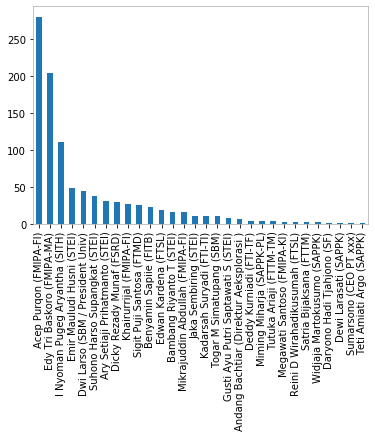

In [20]:
#PLOT RADAR CHART untuk power seorang CaRek
#Terinspirasi dari Winning Eleven
import matplotlib.pyplot as plt

df['CaRek Pilihan'].value_counts().plot(kind='bar') #Menentukan CaRek favorit

CaRek_voters = fav['Kategori Anda'].value_counts()


In [12]:
from math import pi
%matplotlib inline

#Create a data frame from "fav"
CaRekFav = fav['Kategori Anda'].value_counts()

data = pd.DataFrame([CaRekFav], index = [""])
data


,Umum,Alumni,Mahasiswa,Dosen,Pegawai / Tendik
,102,81,57,33,7


In [13]:
Attributes =list(data)
AttNo = len(Attributes)

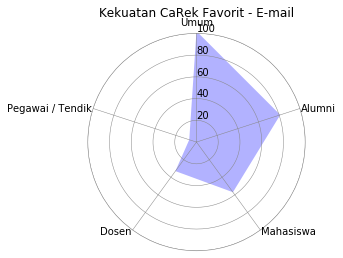

In [14]:
# Plots a radar chart.
 
# Set data
cat = Attributes
values = [102, 81, 57, 33, 7] #nilai harus diganti apabila nilai berganti
 
N = len(cat)
 
x_as = [n / float(N) * 2 * pi for n in range(N)]
 
# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]
 
 
# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")
 
 
# Create polar plot
ax = plt.subplot(111, polar=True)
 
 
# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
 
# Set position of y-labels
ax.set_rlabel_position(0)
 
 
# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
 
 
# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])
 
# Set yticks
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])
 
 
# Plot data
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
 
# Fill area
ax.fill(x_as, values, 'b', alpha=0.3)
 
 
# Set axes limits
plt.ylim(0, 100)
 
 
# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi
 
    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1
 
    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")
 
# Show polar plot
plt.title("Kekuatan CaRek Favorit - E-mail")
plt.show()

In [15]:
#PLOT TIMESTAMP
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
df['TimestampH']=df.Timestamp.dt.hour
df['TimestampH'].tail()

971    15
972     9
973     8
974    11
975    13
Name: TimestampH, dtype: int64

In [17]:
hour=df.loc[df.Timestamp.dt.hour==9].sort_values('TimestampH').tail()

In [18]:
type(df['TimestampH'])

pandas.core.series.Series

Text(0.5, 1.0, 'Timestamp Jam Pengisian Survey - Email')

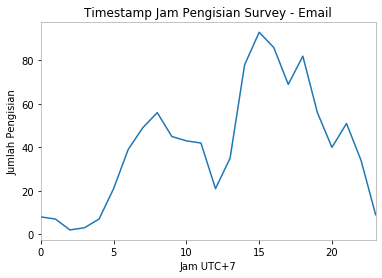

In [19]:
df['TimestampH'].value_counts(sort=False).plot()
plt.xlabel("Jam UTC+7")
plt.ylabel("Jumlah Pengisian")
plt.title("Timestamp Jam Pengisian Survey - Email")